## 0. Computer  Vision libraries to be aware of
* torchvision - base domain library for PyTorch computer vision
* torchvision.datasets - get datsets and data loading functions for compuetr vision
* torchvision.models - get pretrained computer vision models that you can leverage for your own problems
* torchvision.transforms -  fucntions for manipulating your vision data(images) to be suitable for use
* torch.utils.data.Dataset - Base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates python iterable over a dataset

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu116
0.13.1+cu116


## 1. Getting a dataset

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data
    train=True, # do we want the training dataset?
    download=True, # do we want to download it?
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data
    train=False, # do we want the training dataset?
    download=True, # do we want to download it?
    transform = ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input and output shape

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# Check the shape
print(image.shape) # (color_channels, height, width)
label

torch.Size([1, 28, 28])


9

### 1.2 Visualizing our data

Image shape:torch.Size([1, 28, 28])
Squeezed Image shape:torch.Size([28, 28])


Text(0.5, 1.0, '9')

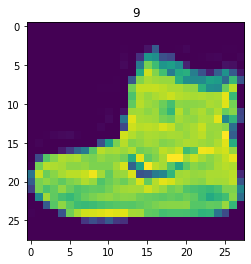

In [10]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze()) # matplotlib expects (H,W) or (H,W,C) not (C,H,W)
print(f"Squeezed Image shape:{image.squeeze().shape}")
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

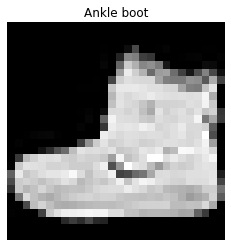

In [11]:
plt.imshow(image.squeeze(), cmap='gray') # greyscale
plt.title(class_names[label])
plt.axis(False)

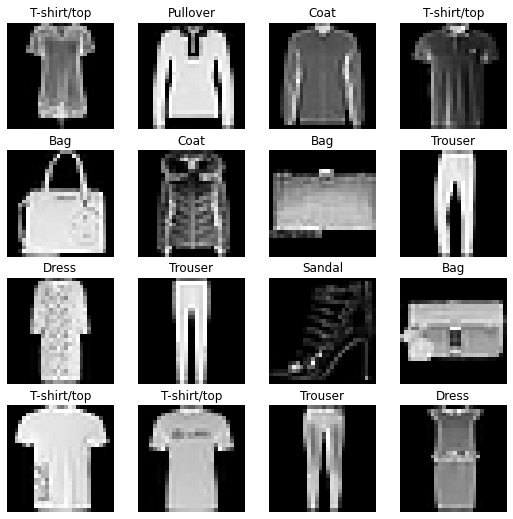

In [12]:
# plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

Right now data is in the form of PyTorch Datasets.
DataLoader turns our dataset into Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. Its more computationally efficient as computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.



In [13]:
from torch.utils.data import DataLoader

# Setup the batch-size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23d5c1645c8>,
 <torch.utils.data.dataloader.DataLoader at 0x23d5c164d08>)

In [14]:
# Lets check what we created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D5C1645C8>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D5C164D08>)
Length of train DataLoader: 1875 batches of 32...
Length of test DataLoader: 313 batches of 32...


In [15]:
# Check whats inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


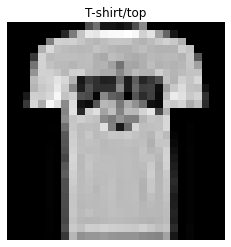

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

A simple model you will try and improve upon with subsequent models/ experiments.

Start simply and add complexity later on

In [17]:
# CREATE A FLATTEN LAYER
flatten_model = nn.Flatten()

# Get a single sample
x =  train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [18]:
# Flatten the sample
output = flatten_model(x) # performs forward pass

print(f"Shape before flattening: {x.shape}") # [color channels, height, width]
print(f"Shape after flattening: {output.shape}") # [color channels, height*width]

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [19]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0157, 0.0000, 0.0000, 0.3843, 0.6157, 0.5333, 0.5216, 0.5098, 0.1882,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0078, 0.0000, 0.0000, 0.5647, 0.5843, 0.0353, 0.0000, 0.0000, 0.1255,
        0.5294, 0.3020, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0078, 0.0000, 0.4784, 0.6157, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.5647, 0.1686, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0078, 0.0000, 0.1412, 0.6667, 0.0980, 0.0000, 0.0078, 0.0000,
        0.0000, 0.0078, 0.0000, 0.3059, 0.4431, 0.0000, 0.0078, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units= 10,
    output_shape=len(class_names)
).to("cpu")


model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss optimizer and evaluation metrics

* Loss- Since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` 
* Evaluation metric- accuarcy

In [24]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

ML is very experimental.

Two of the things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 

In [25]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device = None):
    """Prints difference between start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [26]:
start_time = timer()
#some code...
end_time = timer()
print_train_time(start_time,end_time,device="cpu")

Train time on cpu: 0.000 seconds


1.7499999984238457e-05

### 3.3 Creating a traiing loop and training a model on batches of the data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out
5. Time it all

In [27]:
from tqdm.auto import tqdm # For progress bar

torch.manual_seed(7)
train_time_start_on_cpu = timer()

# Set epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n -----")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Total loss after every batch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {(batch * len(X))}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train data loader
    train_loss/=len(train_dataloader)

    ### testing
    test_loss, test_acc = 0,0
    model_0.eval()

    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # forward pass
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuarcy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out
    print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc {test_acc}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,train_time_end_on_cpu,device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
 -----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:07<00:14,  7.39s/it]


 Train loss: 0.5893 | Test loss: 0.4985 | Test acc 82.08865814696486
epoch: 1
 -----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:14<00:07,  7.09s/it]


 Train loss: 0.4769 | Test loss: 0.5173 | Test acc 81.76916932907348
epoch: 2
 -----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:21<00:00,  7.07s/it]


 Train loss: 0.4548 | Test loss: 0.4640 | Test acc 83.59624600638978
Train time on cpu: 21.293 seconds


In [28]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get Model 0 results

In [29]:
torch.manual_seed(4)
def eval_model(model:torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn:torch.nn.Module, accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale the loss and acc to find average loss/acc per batch
        loss/= len(data_loader)
        acc/= len(data_loader)

    return {"model_name":model.__class__.__name__, # only works when model was created with a class
            "model_loss":loss.item(),
            "model_acc": acc
            }


# Calculate model_0 performance on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 357.63it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4639569818973541,
 'model_acc': 83.59624600638978}

## 5. Device agnostic code

In [30]:
!nvidia-smi

Sat Mar 25 13:56:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:06:00.0  On |                  N/A |
| 26%   42C    P8    N/A /  75W |    321MiB /  4096MiB |     14%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [31]:
torch.cuda.is_available()

True

In [32]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"      
device

'cuda'